credits for scraping code to McKay Johns
https://github.com/mckayjohns/youtube-videos/blob/main/code/sofascore%20scraping.ipynb

In [1]:
import requests

from bs4 import BeautifulSoup

import pandas as pd

In [14]:
response = requests.get(
    'https://www.sofascore.com/inter-red-bull-salzburg/WPsXdb#11605830',
    headers={'User-Agent': 'Mozilla/5.0'} # you'll be blocked if you don't use some type of user agent
)

In [15]:
soup = BeautifulSoup(response.text, 'html.parser')
soup.select('g[cursor="pointer"]')

[]

In [2]:
# These are the headers we need to access the API
headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'dnt': '1',
    'if-none-match': 'W/"4bebed6144"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
}

# you'll need to change the url to match the one you copied. As you can see they have some sort of match id to identify the game --> 10385636
response = requests.get('https://api.sofascore.com/api/v1/event/11407450/shotmap', headers=headers)

In [3]:
# If you make the request without doing anything else though you will get a 304 response
# which means "not modified"
response

<Response [200]>

In [4]:
shots = response.json()

In [5]:
shots

{'shotmap': [{'player': {'name': 'Nicola Sansone',
    'slug': 'nicola-sansone',
    'shortName': 'N. Sansone',
    'position': 'F',
    'userCount': 267,
    'id': 100580},
   'isHome': True,
   'shotType': 'miss',
   'situation': 'assisted',
   'playerCoordinates': {'x': 19.7, 'y': 35.2, 'z': 0},
   'bodyPart': 'left-foot',
   'goalMouthLocation': 'close-high-left',
   'goalMouthCoordinates': {'x': 0, 'y': 57.3, 'z': 41.7},
   'xg': 0.049433212727308,
   'id': 2325458,
   'time': 89,
   'timeSeconds': 5320,
   'draw': {'start': {'x': 35.2, 'y': 19.7},
    'end': {'x': 42.7, 'y': 0},
    'goal': {'x': 42.7, 'y': 58.3}},
   'reversedPeriodTime': 2,
   'reversedPeriodTimeSeconds': 80,
   'incidentType': 'shot'},
  {'player': {'name': 'Nicola Sansone',
    'slug': 'nicola-sansone',
    'shortName': 'N. Sansone',
    'position': 'F',
    'userCount': 267,
    'id': 100580},
   'isHome': True,
   'shotType': 'post',
   'situation': 'assisted',
   'playerCoordinates': {'x': 5, 'y': 44.3, 'z

In [6]:
df = pd.DataFrame(shots['shotmap'])

df.head()


,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,id,time,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType,xgot,blockCoordinates,addedTime
0,"{'name': 'Nicola Sansone', 'slug': 'nicola-san...",True,miss,assisted,"{'x': 19.7, 'y': 35.2, 'z': 0}",left-foot,close-high-left,"{'x': 0, 'y': 57.3, 'z': 41.7}",0.049433,2325458,89,5320,"{'start': {'x': 35.2, 'y': 19.7}, 'end': {'x':...",2,80,shot,NaN,NaN,NaN,NaN
1,"{'name': 'Nicola Sansone', 'slug': 'nicola-san...",True,post,assisted,"{'x': 5, 'y': 44.3, 'z': 0}",head,left,"{'x': 0, 'y': 55.1, 'z': 31.6}",0.174511,2325381,84,5036,"{'start': {'x': 44.3, 'y': 5}, 'end': {'x': 44...",7,364,shot,NaN,NaN,NaN,NaN
2,"{'name': 'Roberto Piccoli', 'slug': 'roberto-p...",True,miss,fast-break,"{'x': 29, 'y': 51.2, 'z': 0}",right-foot,high-right,"{'x': 0, 'y': 39.3, 'z': 79.2}",0.024993,2325317,79,4739,"{'start': {'x': 51.2, 'y': 29}, 'end': {'x': 6...",12,661,shot,NaN,NaN,NaN,NaN
3,"{'name': 'Ylber Ramadani', 'slug': 'ylber-rama...",True,miss,assisted,"{'x': 30.2, 'y': 33.5, 'z': 0}",right-foot,high-right,"{'x': 0, 'y': 41, 'z': 93.1}",0.016079,2325298,79,4680,"{'start': {'x': 33.5, 'y': 30.2}, 'end': {'x':...",12,720,shot,NaN,NaN,NaN,NaN
4,"{'name': 'Nicola Sansone', 'slug': 'nicola-san...",True,miss,free-kick,"{'x': 18.7, 'y': 80.4, 'z': 0}",right-foot,close-right,"{'x': 0, 'y': 43.9, 'z': 5.6}",0.037750,2325274,77,4596,"{'start': {'x': 80.4, 'y': 18.7}, 'end': {'x':...",14,804,shot,NaN,NaN,NaN,NaN


In [7]:
england_shots = df.loc[df['isHome'] == True]
england_shots.head(10)

,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,id,time,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType,xgot,blockCoordinates,addedTime
0,"{'name': 'Nicola Sansone', 'slug': 'nicola-san...",True,miss,assisted,"{'x': 19.7, 'y': 35.2, 'z': 0}",left-foot,close-high-left,"{'x': 0, 'y': 57.3, 'z': 41.7}",0.049433,2325458,89,5320,"{'start': {'x': 35.2, 'y': 19.7}, 'end': {'x':...",2,80,shot,NaN,NaN,NaN,NaN
1,"{'name': 'Nicola Sansone', 'slug': 'nicola-san...",True,post,assisted,"{'x': 5, 'y': 44.3, 'z': 0}",head,left,"{'x': 0, 'y': 55.1, 'z': 31.6}",0.174511,2325381,84,5036,"{'start': {'x': 44.3, 'y': 5}, 'end': {'x': 44...",7,364,shot,NaN,NaN,NaN,NaN
2,"{'name': 'Roberto Piccoli', 'slug': 'roberto-p...",True,miss,fast-break,"{'x': 29, 'y': 51.2, 'z': 0}",right-foot,high-right,"{'x': 0, 'y': 39.3, 'z': 79.2}",0.024993,2325317,79,4739,"{'start': {'x': 51.2, 'y': 29}, 'end': {'x': 6...",12,661,shot,NaN,NaN,NaN,NaN
3,"{'name': 'Ylber Ramadani', 'slug': 'ylber-rama...",True,miss,assisted,"{'x': 30.2, 'y': 33.5, 'z': 0}",right-foot,high-right,"{'x': 0, 'y': 41, 'z': 93.1}",0.016079,2325298,79,4680,"{'start': {'x': 33.5, 'y': 30.2}, 'end': {'x':...",12,720,shot,NaN,NaN,NaN,NaN
4,"{'name': 'Nicola Sansone', 'slug': 'nicola-san...",True,miss,free-kick,"{'x': 18.7, 'y': 80.4, 'z': 0}",right-foot,close-right,"{'x': 0, 'y': 43.9, 'z': 5.6}",0.037750,2325274,77,4596,"{'start': {'x': 80.4, 'y': 18.7}, 'end': {'x':...",14,804,shot,NaN,NaN,NaN,NaN
6,"{'name': 'Lameck Banda', 'firstName': '', 'las...",True,goal,assisted,"{'x': 11.9, 'y': 59.3, 'z': 0}",left-foot,low-left,"{'x': 0, 'y': 53.2, 'z': 9.5}",0.132545,2325157,70,4145,"{'start': {'x': 59.3, 'y': 11.9}, 'end': {'x':...",21,1255,shot,regular,0.2899,NaN,NaN
7,"{'name': 'Nicola Sansone', 'slug': 'nicola-san...",True,goal,corner,"{'x': 2.3, 'y': 46.2, 'z': 0}",left-foot,high-left,"{'x': 0, 'y': 52.5, 'z': 30.4}",0.417557,2325118,66,3952,"{'start': {'x': 46.2, 'y': 2.3}, 'end': {'x': ...",25,1448,shot,regular,0.9431,NaN,NaN
8,"{'name': 'Alexis Blin', 'firstName': '', 'last...",True,miss,corner,"{'x': 8.8, 'y': 53.3, 'z': 0}",head,left,"{'x': 0, 'y': 63.2, 'z': 33.3}",0.080153,2325113,66,3951,"{'start': {'x': 53.3, 'y': 8.8}, 'block': {'x'...",25,1449,shot,NaN,NaN,"{'x': 3.2, 'y': 45.1, 'z': 0}",NaN
12,"{'name': 'Gabriel Strefezza', 'firstName': '',...",True,block,regular,"{'x': 15.6, 'y': 60.6, 'z': 0}",left-foot,low-centre,"{'x': 0, 'y': 50.1, 'z': 19}",0.036907,2324772,45,2749,"{'start': {'x': 60.6, 'y': 15.6}, 'block': {'x...",1,2651,shot,NaN,NaN,"{'x': 13.6, 'y': 59.2, 'z': 0}",1.0
13,"{'name': 'Nikola Krstović', 'slug': 'nikola-kr...",True,miss,assisted,"{'x': 10.2, 'y': 56.3, 'z': 0}",head,close-high,"{'x': 0, 'y': 51.9, 'z': 56.9}",0.049402,2324728,39,2331,"{'start': {'x': 56.3, 'y': 10.2}, 'end': {'x':...",7,369,shot,NaN,NaN,NaN,NaN


In [8]:
italy_shots = df.loc[df['isHome'] == False]
italy_shots.tail(10)

,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,id,time,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType,xgot,blockCoordinates,addedTime
5,"{'name': 'Theo Hernández', 'slug': 'theo-herna...",False,miss,regular,"{'x': 25.1, 'y': 33.7, 'z': 0}",left-foot,close-right,"{'x': 0, 'y': 43.2, 'z': 2.8}",0.011181,2325190,72,4280,"{'start': {'x': 33.7, 'y': 25.1}, 'end': {'x':...",19,1120,shot,NaN,NaN,NaN,NaN
9,"{'name': 'Noah Okafor', 'slug': 'noah-okafor',...",False,save,assisted,"{'x': 8.2, 'y': 30.1, 'z': 0}",right-foot,low-right,"{'x': 0, 'y': 47.2, 'z': 5.7}",0.091794,2325098,64,3789,"{'start': {'x': 30.1, 'y': 8.2}, 'block': {'x'...",27,1611,shot,NaN,0.6907,"{'x': 2.7, 'y': 43.5, 'z': 0}",NaN
10,"{'name': 'Tommaso Pobega', 'slug': 'tommaso-po...",False,save,assisted,"{'x': 15.3, 'y': 56.4, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 50.7, 'z': 4.4}",0.112010,2325003,58,3454,"{'start': {'x': 56.4, 'y': 15.3}, 'block': {'x...",33,1946,shot,NaN,0.0380,"{'x': 3.6, 'y': 52, 'z': 0}",NaN
11,"{'name': 'Samuel Chukwueze', 'firstName': '', ...",False,save,assisted,"{'x': 12.4, 'y': 66.8, 'z': 0}",left-foot,low-right,"{'x': 0, 'y': 46.7, 'z': 1.3}",0.046295,2324860,47,2764,"{'start': {'x': 66.8, 'y': 12.4}, 'block': {'x...",44,2636,shot,NaN,0.1827,"{'x': 2.4, 'y': 53.4, 'z': 0}",NaN
15,"{'name': 'Tijjani Reijnders', 'slug': 'tijjani...",False,post,assisted,"{'x': 10.5, 'y': 66.4, 'z': 0}",right-foot,right,"{'x': 0, 'y': 44.3, 'z': 3.8}",0.241671,2324717,38,2275,"{'start': {'x': 66.4, 'y': 10.5}, 'end': {'x':...",8,425,shot,NaN,NaN,NaN,NaN
16,"{'name': 'Tijjani Reijnders', 'slug': 'tijjani...",False,goal,assisted,"{'x': 12.7, 'y': 57.9, 'z': 0}",right-foot,low-right,"{'x': 0, 'y': 47.1, 'z': 0.6}",0.138765,2324706,35,2094,"{'start': {'x': 57.9, 'y': 12.7}, 'end': {'x':...",11,606,shot,regular,0.5500,NaN,NaN
17,"{'name': 'Olivier Giroud', 'slug': 'olivier-gi...",False,goal,assisted,"{'x': 3.9, 'y': 47.2, 'z': 0}",other,low-centre,"{'x': 0, 'y': 50.1, 'z': 10.8}",0.395733,2324667,28,1631,"{'start': {'x': 47.2, 'y': 3.9}, 'end': {'x': ...",18,1069,shot,regular,0.7229,NaN,NaN
18,"{'name': 'Samuel Chukwueze', 'firstName': '', ...",False,miss,assisted,"{'x': 7.7, 'y': 52.2, 'z': 0}",head,high,"{'x': 0, 'y': 51.8, 'z': 68.1}",0.101106,2324639,24,1426,"{'start': {'x': 52.2, 'y': 7.7}, 'end': {'x': ...",22,1274,shot,NaN,NaN,NaN,NaN
21,"{'name': 'Samuel Chukwueze', 'firstName': '', ...",False,block,assisted,"{'x': 21.4, 'y': 63, 'z': 0}",left-foot,low-left,"{'x': 0, 'y': 52.4, 'z': 19}",0.032331,2324616,21,1225,"{'start': {'x': 63, 'y': 21.4}, 'block': {'x':...",25,1475,shot,NaN,NaN,"{'x': 18.4, 'y': 60.8, 'z': 0}",NaN
22,"{'name': 'Tommaso Pobega', 'slug': 'tommaso-po...",False,save,assisted,"{'x': 9.3, 'y': 32.7, 'z': 0}",left-foot,low-centre,"{'x': 0, 'y': 48.7, 'z': 17.1}",0.041525,2324582,14,788,"{'start': {'x': 32.7, 'y': 9.3}, 'block': {'x'...",32,1912,shot,NaN,0.0689,"{'x': 2.5, 'y': 46, 'z': 0}",NaN


In [9]:
england_shots['playerCoordinates'].iloc[0]['x']

19.7

In [10]:
#Load important libraries
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import pandas as pd
from pandas import json_normalize
import numpy as np

Text(0.5, 1.0, 'Lecce Shots (to the left) and AC Milan Shots (to the right)')

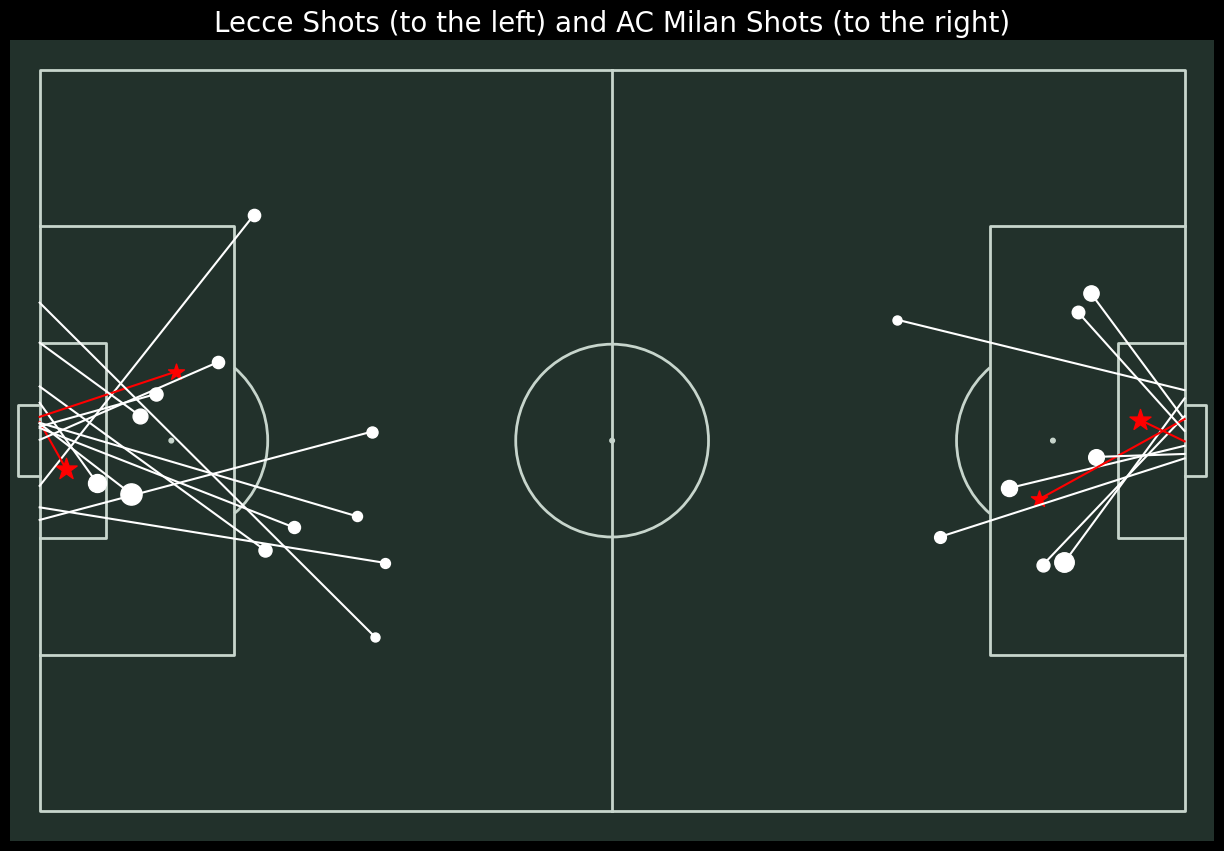

In [12]:
# Let's combine these 2 shot maps in one pitch
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='opta', positional=False, positional_color='#9A9A9A',
              pitch_color='#22312b', line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

#plt.gca().invert_yaxis()

#for x in range(15):
for x in range(len(england_shots['id'])):


    # Size of scatter will depend on xG
    size = np.sqrt(england_shots['xg'].iloc[x])*400
    
    if england_shots['shotType'].iloc[x] == 'goal':
        '''
        We can use the .plot() function to draw lines if we give it two pairs of coordinates:
        *First must contain the start and end X locations
        *Second gives the start and end Y locations
        For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
        '''
        #if england_shots['time'].iloc[x] <= 45:   
        plt.plot((england_shots['playerCoordinates'].iloc[x]['x'],england_shots['goalMouthCoordinates'].iloc[x]['x']),\
            (england_shots['playerCoordinates'].iloc[x]['y'],england_shots['goalMouthCoordinates'].iloc[x]['y']),color='red')
        plt.scatter(england_shots['playerCoordinates'].iloc[x]['x'],england_shots['playerCoordinates'].iloc[x]['y'], s=size, color='red', marker='*')
    else:
        plt.plot((england_shots['playerCoordinates'].iloc[x]['x'],england_shots['goalMouthCoordinates'].iloc[x]['x']),\
            (england_shots['playerCoordinates'].iloc[x]['y'],england_shots['goalMouthCoordinates'].iloc[x]['y']),color='white')
        plt.scatter(england_shots['playerCoordinates'].iloc[x]['x'],england_shots['playerCoordinates'].iloc[x]['y'], s=size, color='white')
    
#plt.title('England Shots',color='white',size=20)

for x in range(len(italy_shots['id'])):
    
    # Size of scatter will depend on xG
    size = np.sqrt(italy_shots['xg'].iloc[x])*400

    if italy_shots['shotType'].iloc[x] == 'goal':
        '''
        We can use the .plot() function to draw lines if we give it two pairs of coordinates:
        *First must contain the start and end X locations
        *Second gives the start and end Y locations
        For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
        '''
            
        plt.plot((100-italy_shots['playerCoordinates'].iloc[x]['x'],100-italy_shots['goalMouthCoordinates'].iloc[x]['x']),\
            (100-italy_shots['playerCoordinates'].iloc[x]['y'],100-italy_shots['goalMouthCoordinates'].iloc[x]['y']),color='red')
        plt.scatter(100-italy_shots['playerCoordinates'].iloc[x]['x'],100-italy_shots['playerCoordinates'].iloc[x]['y'], s=size, color='red', marker='*')
    else:
        plt.plot((100-italy_shots['playerCoordinates'].iloc[x]['x'], 100-italy_shots['goalMouthCoordinates'].iloc[x]['x']),\
            (100-italy_shots['playerCoordinates'].iloc[x]['y'], 100-italy_shots['goalMouthCoordinates'].iloc[x]['y']),color='white')
        plt.scatter(100-italy_shots['playerCoordinates'].iloc[x]['x'], 100-italy_shots['playerCoordinates'].iloc[x]['y'], s=size, color='white')
    
plt.title('Lecce Shots (to the left) and AC Milan Shots (to the right)',color='white',size=20)

https://www.kaggle.com/code/josegabrielgonzalez/understat-series-xg-flow-chart/notebook

https://github.com/znstrider/highlight_text

In [40]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from matplotlib import rcParams
from matplotlib.patches import Arc
import numpy as np
from highlight_text import fig_text
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import json

In [47]:
# Entering Real Sociedad vs Barcelona match link
link = "https://understat.com/match/22417"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')

# Get the shotsData, it's the second script executed in order
strings = scripts[1].string 

# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
shots_match = json.loads(json_data)

In [48]:
# Creatinf the 2 dfs

df_away = pd.DataFrame(shots_match['a'])
df_home = pd.DataFrame(shots_match['h'])

# Selecting only the useful columns

df_away = df_away[['minute','player',"a_team",'result','xG','h_a']]
df_home = df_home[['minute','player',"h_team",'result','xG','h_a']]

# Renaming columns 

df_away.rename(columns={"a_team": "team"})
df_home.rename(columns={"h_team": "team"})

# Changing data types

df_away = df_away.astype({"xG": float, "minute": float})
df_home = df_home.astype({"xG": float, "minute": float})

# Creating new column xG cumulative
df_away['xGcum'] = np.cumsum(df_away['xG'])
df_home['xGcum'] = np.cumsum(df_home['xG'])

In [49]:
# creating the dictionaries
x = df_home[df_home['result']=='Goal']['minute'].tolist()
x1 = df_away[df_away['result']=='Goal']['minute'].tolist()
y =df_home[df_home['result']=='Goal']['xGcum'].tolist()
y1 = df_away[df_away['result']=='Goal']['xGcum'].tolist()

# xG inside the scatterplots
y_plot =np.round(df_home[df_home['result']=='Goal']['xG'],2).tolist()
y1_plot = np.round(df_away[df_away['result']=='Goal']['xG'],2).tolist()

# Annotation text
text_home = df_home[df_home['result']=='Goal']['player'].tolist()
text_away = df_away[df_away['result']=='Goal']['player'].tolist()
label_home = df_home['h_team'].unique().tolist()
label_away = df_away['a_team'].unique().tolist()

# More annotation text
xGcum_away = str(np.round(df_away['xGcum'].iloc[-1],3))
xGcum_home = str(np.round(df_home['xGcum'].iloc[-1],3))
team_away = str(df_away['a_team'].iloc[-1])
team_home = str(df_home['h_team'].iloc[-1])

C:\Users\4krav\AppData\Local\Temp\ipykernel_34888\107930615.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [1000]
C:\Users\4krav\AppData\Local\Temp\ipykernel_34888\107930615.py:30: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [1000]


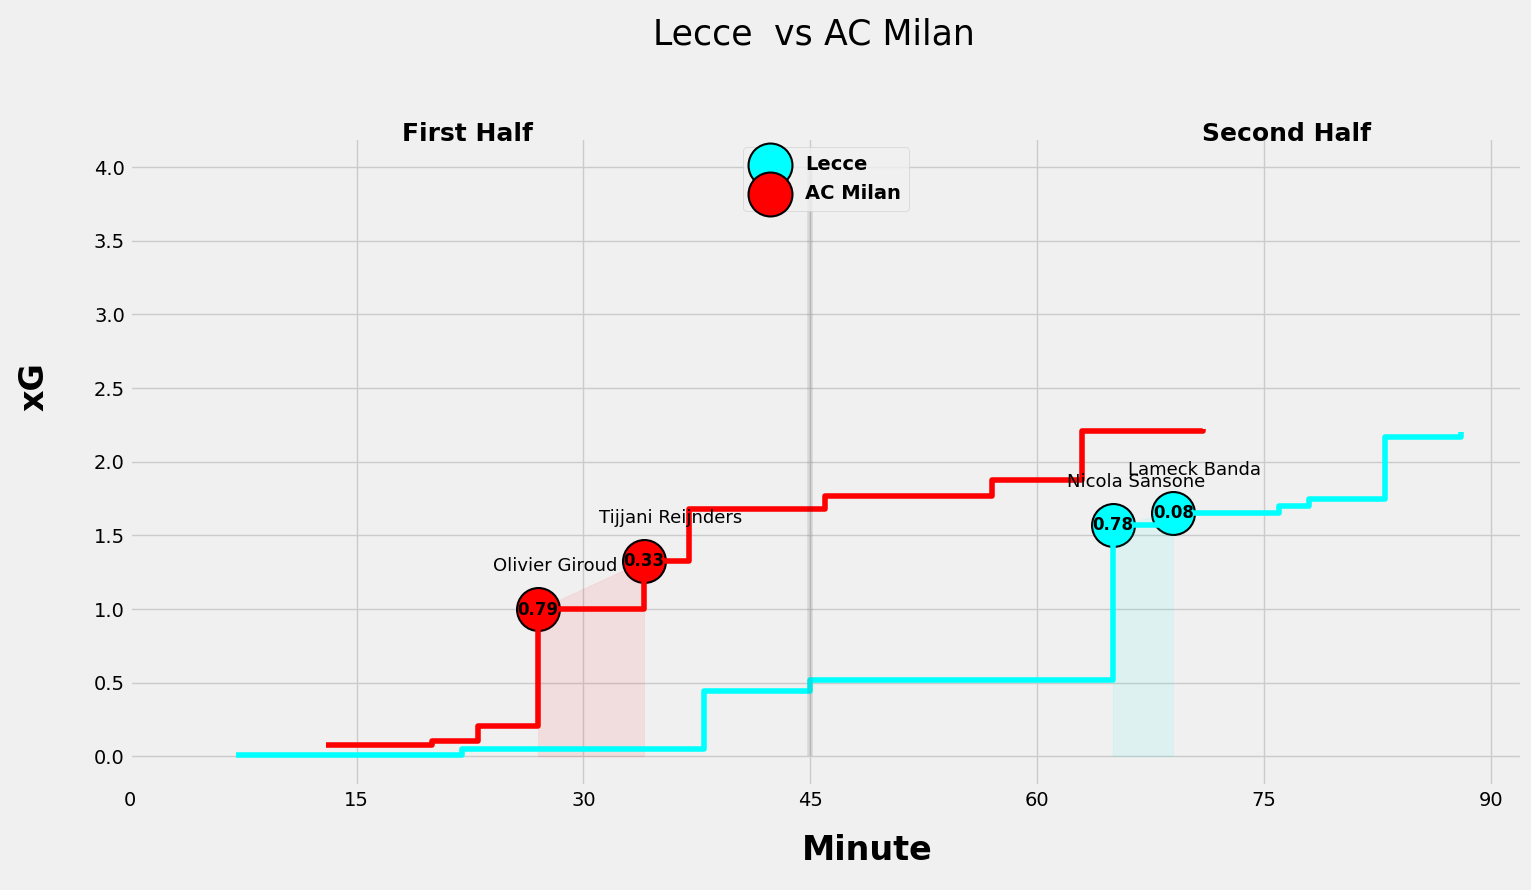

In [104]:
# plot style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (16,8))

# Step plot for Inter and Udinese 
ax.step(x = df_home['minute'] ,y = df_home['xGcum'] , where = 'post', color = 'cyan' ,linewidth = 4.0)
ax.step(x = df_away['minute'] ,y = df_away['xGcum'] , where = 'post', color = 'red' ,linewidth = 4.0)

#sns.scatterplot(x=x,y=y,s=430,marker='o',color='yellow')
ax.scatter(x=x,y=y, color='cyan', edgecolor='black',s=955, label="Lecce",linewidths=1.5,)
ax.scatter(x=x1,y=y1, color='red', edgecolor='black',s=955, label="AC Milan",linewidths=1.5)

#FILL AREA BETWEEN LINE AND X 
plt.fill_between(x, y, alpha=0.08, color='cyan')
plt.fill_between(x1, y1, alpha=0.08, color='red')

# https://stackoverflow.com/questions/63541222/fill-between-two-lines-lacking-common-x-values

# Text annotation for goals
for i in range(len(x1)):
    plt.annotate(text_away[i], (x1[i]- 3, y1[i] + 0.26),c='black',size=13)
for i in range(len(x)):
    plt.annotate(text_home[i], (x[i]- 3, y[i] + 0.26),c='black',size=13)

# legend
legend = ax.legend(loc="upper center",prop={'weight':'bold'}, labelcolor='black')
# These legends are for ax.scatter(x=x1,y=y1, color='red', edgecolor='black',s=955, label="AC Milan",linewidths=1.5)
# First is for the first team, second for the second
legend.legendHandles[0]._sizes = [1000]
legend.legendHandles[1]._sizes = [1000]

# title
#fig_text(0.41,0.97, s="xG Flowchart Serie A\n", fontsize = 20, fontweight = "light", c='black')
fig_text(0.4,1.03,s=" <{} > vs <{} >".format(team_home,team_away),highlight_textprops=[{"color":'blue'},
                                            {'color':"red"}], c='black', fontsize = 25, fontweight="light")

# text
fig_text(0.5,0.01, s="Minute\n", fontsize = 24, fontweight = "bold", color = "black")
fig_text(0.01,0.6, s="xG\n", fontsize = 24, fontweight = "bold", color = "black",rotation=90)
fig_text(0.25,0.9, s="First Half\n", fontsize = 18, fontweight = "bold", color = "black")
fig_text(0.75,0.9, s="Second Half\n", fontsize = 18, fontweight = "bold", color = "black")

# Finally a dotted line to separate the HT 
plt.vlines( ymin=0, ymax=4,x=45, color='black', alpha=0.1,linestyle="solid")
# ticks
plt.xticks([0,15,30,45,60,75,90], color='black')
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4], color='black')

# Annotate quality chances inside the scatterplots

# Home team
for i in range(len(x)):
    plt.annotate(y_plot[i], (x[i], y[i]),c='black',size=12,ha='center',va='center',fontweight='bold')
# Away team
for i in range(len(x1)):
    plt.annotate(y1_plot[i], (x1[i], y1[i]),c='black',size=12,ha='center',va='center',fontweight='bold')

In [34]:
df = df.iloc[::-1]
df.reset_index(inplace=True)
df.head()

,index,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,...,time,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType,xgot,blockCoordinates,addedTime
0,23,"{'name': 'Hamza Rafia', 'firstName': '', 'last...",True,miss,assisted,"{'x': 29.3, 'y': 23.5, 'z': 0}",right-foot,left,"{'x': 0, 'y': 68.6, 'z': 8.3}",0.010932,...,8,425,"{'start': {'x': 23.5, 'y': 29.3}, 'end': {'x':...",38,2275,shot,NaN,NaN,NaN,NaN
1,22,"{'name': 'Tommaso Pobega', 'slug': 'tommaso-po...",False,save,assisted,"{'x': 9.3, 'y': 32.7, 'z': 0}",left-foot,low-centre,"{'x': 0, 'y': 48.7, 'z': 17.1}",0.041525,...,14,788,"{'start': {'x': 32.7, 'y': 9.3}, 'block': {'x'...",32,1912,shot,NaN,0.0689,"{'x': 2.5, 'y': 46, 'z': 0}",NaN
2,21,"{'name': 'Samuel Chukwueze', 'firstName': '', ...",False,block,assisted,"{'x': 21.4, 'y': 63, 'z': 0}",left-foot,low-left,"{'x': 0, 'y': 52.4, 'z': 19}",0.032331,...,21,1225,"{'start': {'x': 63, 'y': 21.4}, 'block': {'x':...",25,1475,shot,NaN,NaN,"{'x': 18.4, 'y': 60.8, 'z': 0}",NaN
3,20,"{'name': 'Lameck Banda', 'firstName': '', 'las...",True,save,assisted,"{'x': 27.7, 'y': 39.8, 'z': 0}",right-foot,low-left,"{'x': 0, 'y': 52.4, 'z': 12.7}",0.017018,...,23,1322,"{'start': {'x': 39.8, 'y': 27.7}, 'block': {'x...",23,1378,shot,NaN,0.0635,"{'x': 2.2, 'y': 49.3, 'z': 0}",NaN
4,19,"{'name': 'Gabriel Strefezza', 'firstName': '',...",True,save,assisted,"{'x': 22.2, 'y': 38.3, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 51.7, 'z': 5.1}",0.034559,...,23,1379,"{'start': {'x': 38.3, 'y': 22.2}, 'block': {'x...",23,1321,shot,NaN,0.0582,"{'x': 1.4, 'y': 48, 'z': 0}",NaN


In [35]:
# Creatinf the 2 dfs

df_away = df.loc[df['isHome'] == True]
df_home = df.loc[df['isHome'] == False]

# Selecting only the useful columns

df_away = df_away[['time','xg','isHome', 'shotType']]
df_home = df_home[['time','xg','isHome', 'shotType']]

# Renaming columns 

df_away.rename(columns={"a_team": "team"})
df_home.rename(columns={"h_team": "team"})

# Changing data types

df_away = df_away.astype({"xg": float, "time": float})
df_home = df_home.astype({"xg": float, "time": float})

# Creating new column xG cumulative
df_away['xGcum'] = np.cumsum(df_away['xg'])
df_home['xGcum'] = np.cumsum(df_home['xg'])


#df_away = df_away.iloc[::-1]
#df_home = df_home.iloc[::-1]

In [45]:
# creating the dictionaries
x = df_home[df_home['shotType']=='goal']['time'].tolist()
x1 = df_away[df_away['shotType']=='goal']['time'].tolist()
y =df_home[df_home['shotType']=='goal']['xGcum'].tolist()
y1 = df_away[df_away['shotType']=='goal']['xGcum'].tolist()

# xG inside the scatterplots
y_plot =np.round(df_home[df_home['shotType']=='goal']['xg'],2).tolist()
y1_plot = np.round(df_away[df_away['shotType']=='goal']['xg'],2).tolist()

# Annotation text
text_home = df_home[df_home['shotType']=='goal']['time'].tolist()
text_away = df_away[df_away['shotType']=='goal']['time'].tolist()
label_home = 'Lecce'#.unique().tolist()
label_away = 'AC Milan'#.unique().tolist()

# More annotation text
xGcum_away = str(np.round(df_away['xGcum'].iloc[-1],3))
xGcum_home = str(np.round(df_home['xGcum'].iloc[-1],3))
#team_away = str(df_away['a_team'].iloc[-1])
#team_home = str(df_home['h_team'].iloc[-1])

C:\Users\4krav\AppData\Local\Temp\ipykernel_34888\3560709524.py:25: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [1000]
C:\Users\4krav\AppData\Local\Temp\ipykernel_34888\3560709524.py:26: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [1000]


NameError: name 'team_home' is not defined

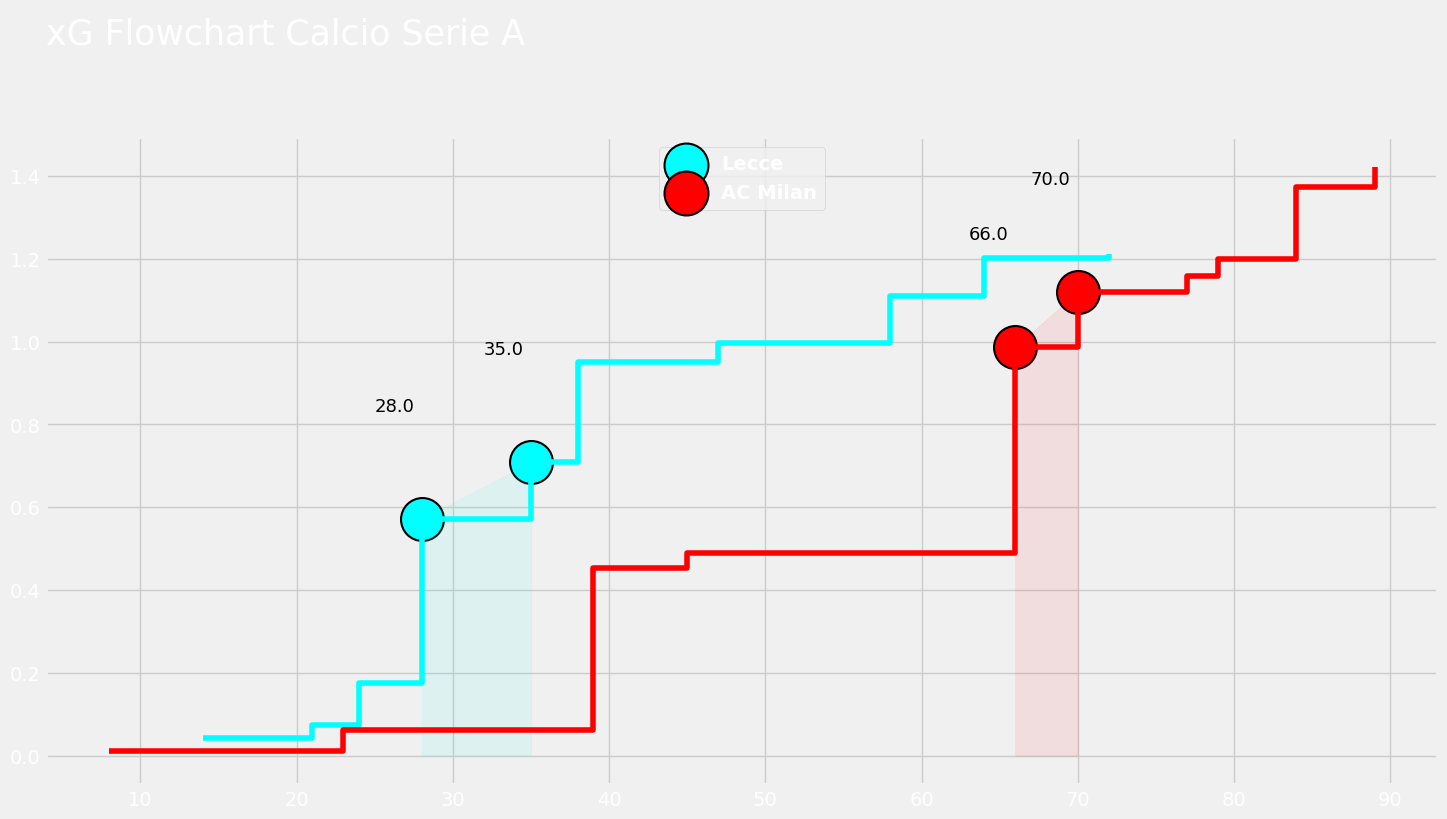

In [46]:
# plot style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (16,8))

# Step plot for Inter and Udinese 
ax.step(x = df_home['time'] ,y = df_home['xGcum'] , where = 'post', color = 'cyan' ,linewidth = 4.0)
ax.step(x = df_away['time'] ,y = df_away['xGcum'] , where = 'post', color = 'red' ,linewidth = 4.0)

#sns.scatterplot(x=x,y=y,s=430,marker='o',color='yellow')
ax.scatter(x=x,y=y, color='cyan', edgecolor='black',s=955, label="Lecce",linewidths=1.5,)
ax.scatter(x=x1,y=y1, color='red', edgecolor='black',s=955, label="AC Milan",linewidths=1.5)

#FILL AREA BETWEEN LINE AND X 
plt.fill_between(x,y, alpha=0.08, color='cyan')
plt.fill_between(x1,y1, alpha=0.08, color='red')

# Text annotation for goals
for i in range(len(x1)):
    plt.annotate(text_away[i], (x1[i]- 3, y1[i] + 0.26),c='black',size=13)
for i in range(len(x)):
    plt.annotate(text_home[i], (x[i]- 3, y[i] + 0.26),c='black',size=13)

# legend
legend = ax.legend(loc="upper center",prop={'weight':'bold'})
legend.legendHandles[0]._sizes = [1000]
legend.legendHandles[1]._sizes = [1000]

# title
fig_text(0.08,1.03, s="xG Flowchart Calcio Serie A\n", fontsize = 25, fontweight = "light")
fig_text(0.08,0.97, s=" <{} {} xG> vs <{} {} xG>".format(team_home,xGcum_home,team_away,xGcum_away),highlight_textprops=[{"color":'cyan'}, {'color':"red"}], fontsize = 20, fontweight="light")

# text
fig_text(0.5,0.01, s="Minute\n", fontsize = 24, fontweight = "bold", color = "black")
fig_text(0.01,0.6, s="xG\n", fontsize = 24, fontweight = "bold", color = "black",rotation=90)
fig_text(0.25,0.9, s="First Half\n", fontsize = 18, fontweight = "bold", color = "black")
fig_text(0.75,0.9, s="Second Half\n", fontsize = 18, fontweight = "bold", color = "black")

# Finally a dotted line to separate the HT 
plt.vlines( ymin=0, ymax=4,x=45, color='black', alpha=0.1,linestyle="solid")
# ticks
plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4])

# Annotate quality chances inside the scatterplots

# Home team
for i in range(len(x)):
    plt.annotate(y_plot[i], (x[i], y[i]),c='black',size=12,ha='center',va='center',fontweight='bold')
# Away team
for i in range(len(x1)):
    plt.annotate(y1_plot[i], (x1[i], y1[i]),c='black',size=12,ha='center',va='center',fontweight='bold')

In [13]:
df.head()

,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,id,time,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType,xgot,blockCoordinates,addedTime
0,"{'name': 'Nicola Sansone', 'slug': 'nicola-san...",True,miss,assisted,"{'x': 19.7, 'y': 35.2, 'z': 0}",left-foot,close-high-left,"{'x': 0, 'y': 57.3, 'z': 41.7}",0.049433,2325458,89,5320,"{'start': {'x': 35.2, 'y': 19.7}, 'end': {'x':...",2,80,shot,NaN,NaN,NaN,NaN
1,"{'name': 'Nicola Sansone', 'slug': 'nicola-san...",True,post,assisted,"{'x': 5, 'y': 44.3, 'z': 0}",head,left,"{'x': 0, 'y': 55.1, 'z': 31.6}",0.174511,2325381,84,5036,"{'start': {'x': 44.3, 'y': 5}, 'end': {'x': 44...",7,364,shot,NaN,NaN,NaN,NaN
2,"{'name': 'Roberto Piccoli', 'slug': 'roberto-p...",True,miss,fast-break,"{'x': 29, 'y': 51.2, 'z': 0}",right-foot,high-right,"{'x': 0, 'y': 39.3, 'z': 79.2}",0.024993,2325317,79,4739,"{'start': {'x': 51.2, 'y': 29}, 'end': {'x': 6...",12,661,shot,NaN,NaN,NaN,NaN
3,"{'name': 'Ylber Ramadani', 'slug': 'ylber-rama...",True,miss,assisted,"{'x': 30.2, 'y': 33.5, 'z': 0}",right-foot,high-right,"{'x': 0, 'y': 41, 'z': 93.1}",0.016079,2325298,79,4680,"{'start': {'x': 33.5, 'y': 30.2}, 'end': {'x':...",12,720,shot,NaN,NaN,NaN,NaN
4,"{'name': 'Nicola Sansone', 'slug': 'nicola-san...",True,miss,free-kick,"{'x': 18.7, 'y': 80.4, 'z': 0}",right-foot,close-right,"{'x': 0, 'y': 43.9, 'z': 5.6}",0.037750,2325274,77,4596,"{'start': {'x': 80.4, 'y': 18.7}, 'end': {'x':...",14,804,shot,NaN,NaN,NaN,NaN


In [32]:
df_away

,time,xg,isHome,shotType,xGcum
23,8.0,0.010932,True,miss,1.422677
20,23.0,0.017018,True,save,1.411746
19,23.0,0.034559,True,save,1.394728
14,39.0,0.340839,True,save,1.360169
13,39.0,0.049402,True,miss,1.019330
12,45.0,0.036907,True,block,0.969927
8,66.0,0.080153,True,miss,0.933020
7,66.0,0.417557,True,goal,0.852868
6,70.0,0.132545,True,goal,0.435310
4,77.0,0.037750,True,miss,0.302766
